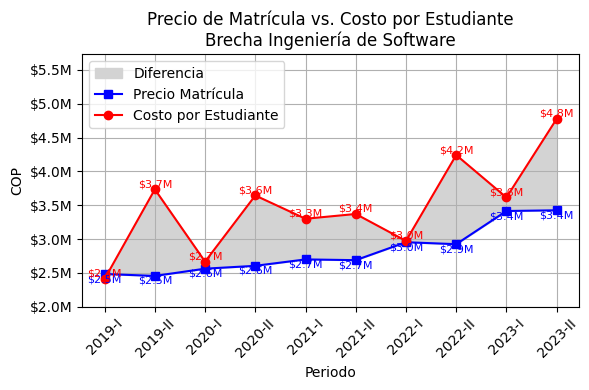

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos actualizados para Ingeniería de Software
data = {
    'PERIODO': ['2019-I', '2019-II', '2020-I', '2020-II', '2021-I', '2021-II', '2022-I', '2022-II', '2023-I', '2023-II'],
    'COSTO PROMEDIO POR ESTUDIANTE': [2411846.765, 3734960.087, 2667242.355, 3644654.037, 3300820.75, 3371364.524, 2973418.922, 4242148.502, 3615125.863, 4776527.349],
    'precio_por_estudiante': [2484348, 2455955.457, 2563183.278, 2605479, 2700075.591, 2689001.043, 2954140.127, 2925178.147, 3415311.532, 3425936.652]
}
df = pd.DataFrame(data)

# Calcular la diferencia entre costo por estudiante y precio de matrícula
df['diferencia'] = df['COSTO PROMEDIO POR ESTUDIANTE'] - df['precio_por_estudiante']

# Crear la gráfica de líneas con área sombreada
plt.figure(figsize=(6, 4))
plt.fill_between(df['PERIODO'], df['COSTO PROMEDIO POR ESTUDIANTE'], df['precio_por_estudiante'], color='lightgray', label='Diferencia')

# Función para formatear los valores en millones con una sola cifra decimal
def format_currency(value):
    return f'${value * 1e-6:.1f}M'

# Graficar líneas y agregar valores
for column, color, marker, label in [
    ('precio_por_estudiante', 'blue', 's', 'Precio Matrícula'),
    ('COSTO PROMEDIO POR ESTUDIANTE', 'red', 'o', 'Costo por Estudiante')
]:
    plt.plot(df['PERIODO'], df[column], marker=marker, color=color, label=label)
    for i, value in enumerate(df[column]):
        plt.text(df['PERIODO'][i], value, format_currency(value), ha='center',
                 va='bottom' if column == 'COSTO PROMEDIO POR ESTUDIANTE' else 'top',
                 fontsize=8, color=color)

# Ajustes de la gráfica
plt.xlabel('Periodo')
plt.ylabel('COP')
plt.title('Precio de Matrícula vs. Costo por Estudiante\nBrecha Ingeniería de Software')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar los límites del eje y para que los textos no se superpongan
plt.ylim(2000000, max(df['COSTO PROMEDIO POR ESTUDIANTE']) * 1.2)

# Función para formatear el eje Y en millones
def millions_formatter(x, pos):
    return f'${x * 1e-6:.1f}M'

# Aplicar el formateador personalizado al eje Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Ajustar los márgenes para que las etiquetas no se corten
plt.tight_layout()

# Guardar la gráfica en alta resolución
plt.savefig('precio_vs_costo_estudiante_brecha_ingenieria_software.png', dpi=300)

# Mostrar la gráfica
plt.show()

from google.colab import files
files.download('/content/precio_vs_costo_estudiante_brecha_ingenieria_software.png')
